In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def Read_data(df: pd.DataFrame)->pd.DataFrame:
     
     """
     Read the 
     data top 
     5 rows.
     
     """
     
     try:
          
          data = pd.read_csv(df)
          return data
     
     except TypeError :
          raise TypeError("Type Error:")
     
     except Exception as e:
          
          print(f"Error: {e}")
          
data = Read_data(df = r"C:\InhouseInternship\majorproject7\Test set.csv")
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [2]:
def Select_data(data : pd.DataFrame)->pd.DataFrame:
     
     """
     Select the data
     
     """
     
     try:
          
          data_cols = data.filter(items=['Height', 'Weight'])
          return data_cols
     
     except Exception as e:
          print(f"Error: {e}")
          
data_cols = Select_data(data)
data_cols.head()

,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496


In [3]:
def Isolate_X(data_cols : pd.DataFrame)->pd.DataFrame:
     
     
     """
     Isolate X
     
     """
     try:
          X = data_cols.iloc[:, 0:1]
          return X
     
     except Exception as e:
          
          print(f"Error: {e}")
          
def Isolate_Y(data_cols: pd.Series)->pd.Series:
     
     """
     Isolate Y
     
     """
     try:
          y = data_cols.Weight
          return y
     except Exception as e:
          print(f"Error: {e}")
          
          
X = Isolate_X(data_cols)
X

,Height
0,146.323241
1,175.695412
2,183.216164
3,184.245269
4,132.302261
...,...
200,155.090314
201,149.175907
202,168.030874
203,172.608090


In [4]:
y = Isolate_Y(data_cols)
y

0      59.861065
1      77.863687
2      72.131992
3      77.546000
4      55.188496
         ...    
200    77.248911
201    93.231692
202    63.640623
203    55.189983
204    45.583285
Name: Weight, Length: 205, dtype: float64

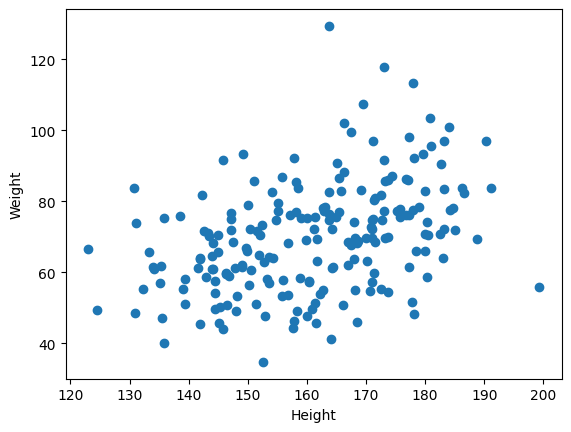

In [5]:
def Visualize(data_cols:pd.DataFrame)->None:
     
     """
     Visualize on 
     the Graph
     
     """
     
     import matplotlib.pyplot as plt
     try:
          plt.scatter(data_cols['Height'],
                      data_cols['Weight']
                      )
          plt.xlabel('Height')
          plt.ylabel('Weight')
          plt.show()
          
     except Exception as e:
          print(f"Error: {e}")
          
Visualize(data_cols)

In [6]:
def Split_data(X: pd.DataFrame, y:pd.Series
               ):
     
     """
     Divide the
     data into 
     training and
     testing.
     
     """
     try:
          from sklearn.model_selection import train_test_split
          X_train, X_test,y_train, y_test = train_test_split(X, y,
                                                            test_size=0.2,
                                                            random_state=42
                                                            )
          
          return X_train, X_test, y_train, y_test
          
     except Exception as e:
          print(f"Error: {e}")
          return None, None, None, None
          
          
X_train, X_test, y_train, y_test = Split_data(X, y) 
        
          

In [7]:
# Fit the model

def Fit_the_model(X_train: pd.DataFrame, y_train:pd.Series):
     
     try:
          from sklearn.linear_model import LinearRegression
          lr = LinearRegression()
          return lr.fit(X_train, y_train)
     
     except Exception as e:
          print(f"Error: {e}")
          
          
          
lr = Fit_the_model(X_train, y_train)
lr

LinearRegression()

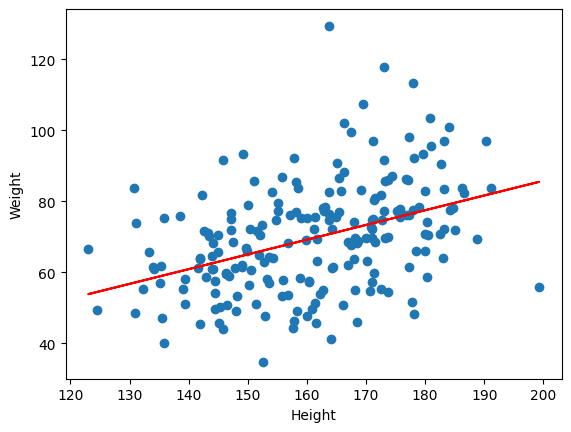

In [8]:
def Visualizes(data_cols:pd.DataFrame)->None:
     
     """
     Visualize on 
     the Graph
     
     """
     
     import matplotlib.pyplot as plt
     try:
          plt.scatter(data_cols['Height'], data_cols['Weight'])
          plt.plot(X_train, lr.predict(X_train), color = 'red')
          plt.xlabel('Height')
          plt.ylabel('Weight')
          plt.show()
          
     except Exception as e:
          print(f"Error: {e}")
          
Visualizes(data_cols)

In [9]:
m = lr.coef_
m

array([0.4150752])

In [10]:
lr

LinearRegression()

In [11]:
b = lr.intercept_
b

2.7615365818210478

In [12]:
def Find_coef_intercept(lr)->tuple:
     
     """
     Find the 
     m and b
     
     """
     try:
          m = lr.coef_
          b = lr.intercept_
          return m, b
     
     except AttributeError:
        raise AttributeError("Ensure the input object 'lr' is a trained regression model with 'coef_' and 'intercept_' attributes.")
     
     except Exception as e:
          
          print(f"Error: {e}")
          
     
          
m, b = Find_coef_intercept(lr)
print("The value of m and b is: \n",m, b)

The value of m and b is: 
 [0.4150752] 2.7615365818210478


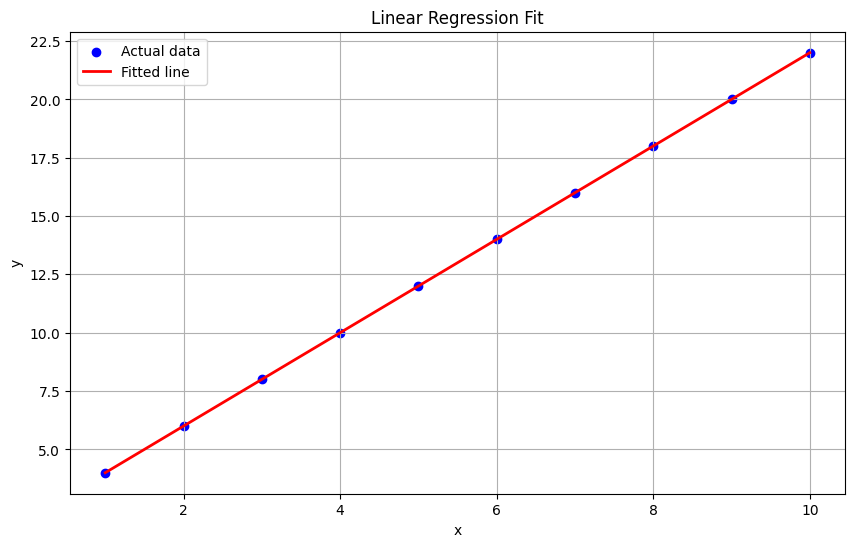

array([2., 2.])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Add bias (intercept term)
        ones = np.ones((X.shape[0], 1))
        X_design = np.hstack((ones, X.reshape(-1, 1)))

        # Calculate weights using normal equation
        self.weights = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

    def predict(self, X):
        # Add bias (intercept term)
        ones = np.ones((X.shape[0], 1))
        X_design = np.hstack((ones, X.reshape(-1, 1)))

        return X_design @ self.weights

    def get_weights(self):
        return self.weights

# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([4, 6, 8, 10, 12, 14, 16, 18, 20, 22])

# Instantiate and train the model
model = LinearRegression()
model.fit(x, y)

# Get predictions and weights
y_pred = model.predict(x)
weights = model.get_weights()

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, y_pred, color="red", label="Fitted line", linewidth=2)
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

weights


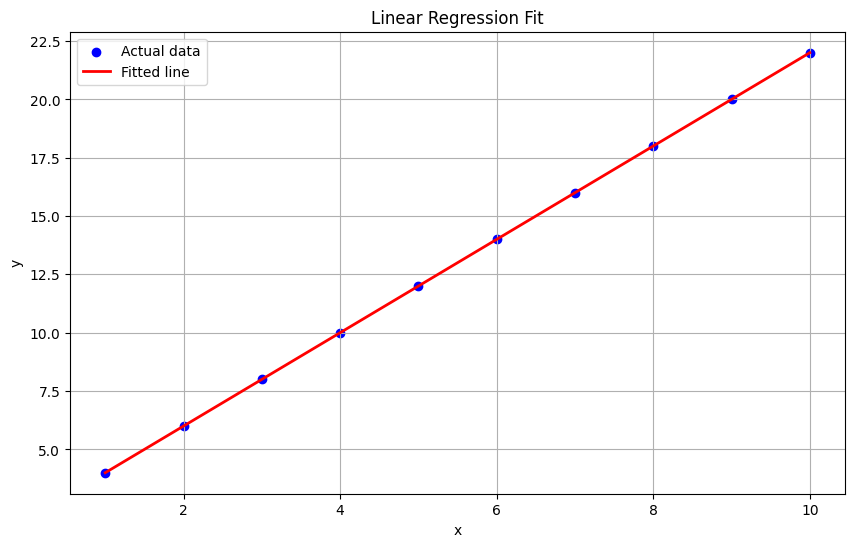

array([2., 2.])

In [15]:
# Reimporting libraries after environment reset
import numpy as np
import matplotlib.pyplot as plt

# Defining the Linear Regression class
class LinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Add bias (intercept term)
        ones = np.ones((X.shape[0], 1))
        X_design = np.hstack((ones, X.reshape(-1, 1)))

        # Calculate weights using normal equation
        self.weights = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

    def predict(self, X):
        # Add bias (intercept term)
        ones = np.ones((X.shape[0], 1))
        X_design = np.hstack((ones, X.reshape(-1, 1)))

        return X_design @ self.weights

    def get_weights(self):
        return self.weights

# Dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([4, 6, 8, 10, 12, 14, 16, 18, 20, 22])

# Instantiate and train the model
model = LinearRegression()
model.fit(x, y)

# Get predictions and weights
y_pred = model.predict(x)
weights = model.get_weights()

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color="blue", label="Actual data")
plt.plot(x, y_pred, color="red", label="Fitted line", linewidth=2)
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

weights


In [17]:
import numpy as np
import pandas as pd
import datetime
import json
import requests
ferrara = json.loads(requests.get("http://api.openweathermap.org/data/2.5/weather?q=Ferrara, IT&appid=5807ad2a45eb6bf4e81d137dafe74e15").text)

In [18]:
ferrara

{'coord': {'lon': 11.8333, 'lat': 44.8},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 280.26,
  'feels_like': 277.99,
  'temp_min': 279.85,
  'temp_max': 280.4,
  'pressure': 1017,
  'humidity': 66,
  'sea_level': 1017,
  'grnd_level': 1017},
 'visibility': 10000,
 'wind': {'speed': 3.32, 'deg': 30, 'gust': 5.67},
 'clouds': {'all': 100},
 'dt': 1736608478,
 'sys': {'type': 2,
  'id': 2007888,
  'country': 'IT',
  'sunrise': 1736578106,
  'sunset': 1736610740},
 'timezone': 3600,
 'id': 3177088,
 'name': 'Provincia di Ferrara',
 'cod': 200}

In [19]:
list(ferrara.keys())

['coord',
 'weather',
 'base',
 'main',
 'visibility',
 'wind',
 'clouds',
 'dt',
 'sys',
 'timezone',
 'id',
 'name',
 'cod']

In [20]:
print('Coordinates = ', ferrara['coord'])

Coordinates =  {'lon': 11.8333, 'lat': 44.8}
